In [1]:
!pip install -Uqq nixtla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.9 MB/s eta 0:00:00


In [2]:
from nixtla.utils import in_colab
import pandas as pd
from nixtla import NixtlaClient
from google.colab import userdata
NIXTLA_API_KEY = userdata.get('NIXTLA_API_KEY')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
IN_COLAB = in_colab()

In [4]:
nixtla_client = NixtlaClient(
    api_key = NIXTLA_API_KEY
)

In [5]:
import pandas as pd
from datetime import datetime

In [6]:
def convert_date_to_readable_format(timestamp_col):
    return timestamp_col.apply(lambda x: datetime.utcfromtimestamp(x / 1000).strftime('%Y-%m-%d'))

In [11]:
data_url = 'https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/refs/heads/main/datasets/usdeur.csv'

In [10]:
data_url = 'https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/refs/heads/main/datasets/air_passengers.csv'

In [12]:
# Import necessary libraries
import pandas as pd
from datetime import datetime

# Function to convert timestamp to readable date format
def convert_date_to_readable_format(timestamp_col):
    # Ensure that the input is in milliseconds and convert it to datetime
    return timestamp_col.apply(lambda x: datetime.utcfromtimestamp(x / 1000).strftime('%Y-%m-%d') if pd.notnull(x) else x)

# Load your dataset (assuming 'df' is your DataFrame)
df = pd.read_csv(data_url)  # Replace with actual file path or dataset loading method

# Check if the 'timestamp' column needs conversion from datetime to timestamp (in milliseconds)
if pd.api.types.is_datetime64_any_dtype(df['timestamp']):
    df['timestamp'] = (df['timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta(milliseconds=1)

# Apply the conversion function to modify the timestamp column in place
df['timestamp'] = convert_date_to_readable_format(df['timestamp'])

# Display the modified dataset
print(df.head())
df.dtypes

# Note: Ensure that the column 'timestamp' is in Unix format (milliseconds since epoch).
# If the column is already a datetime type, you may need to adjust the logic accordingly.


    timestamp   value
0  2007-01-01  0.7537
1  2007-01-02  0.7537
2  2007-01-03  0.7559
3  2007-01-04  0.7631
4  2007-01-05  0.7644


,0
timestamp,object
value,float64


In [13]:
df.rename(columns={'timestamp': 'ds', 'value': 'y'}, inplace=True)
df.head()

,ds,y
0,2007-01-01,0.7537
1,2007-01-02,0.7537
2,2007-01-03,0.7559
3,2007-01-04,0.7631
4,2007-01-05,0.7644


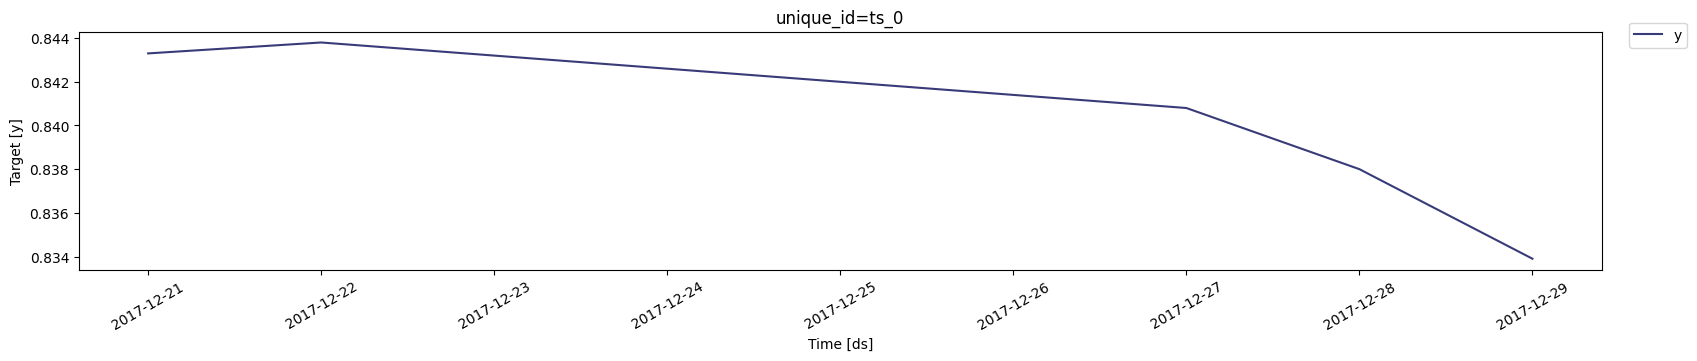

In [19]:
nixtla_client.plot(df, max_insample_length=5)

## Anomaly Detection with Exogenous Features

In [ ]:
anomalies_df_x = nixtla_client.detect_anomalies(
    df,
    freq='D',
    date_features=['month', 'year'],
    date_features_to_one_hot=True,
)

## Modifying the Confidence Intervals

In [ ]:
anomalies_df = nixtla_client.detect_anomalies(
    df,
    freq='D',
    level=70
)